<a href="https://colab.research.google.com/github/rsher60/Comaprision-of-CNN-with-Recurrent-ConvNet/blob/master/CNN%20vs%20Recurrent%20ConvNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import cv2
import matplotlib.pyplot as plt
import os, shutil
from keras.preprocessing.image import ImageDataGenerator
import glob
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten, Reshape, Activation,SimpleRNN,GRU, LSTM
from keras.layers.convolutional import Conv2D,Conv3D, Conv2DTranspose, Conv3DTranspose
from keras.layers.convolutional import MaxPooling2D,MaxPooling3D, UpSampling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.wrappers import TimeDistributed
import keras

Using TensorFlow backend.


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
base = "/content/gdrive/My Drive/Source_4/Categorized_Parts/"

In [0]:
count_blender = {}
for folders in os.listdir(base):
  count = 0
  path = os.path.join(base, folders)
  if 'BlenderImages' in os.listdir(path):
    path = os.path.join(path, 'BlenderImages')
    for subfolder in os.listdir(path):
      if os.path.isdir(os.path.join(path, subfolder)):
        count += 1
  count_blender[folders] = count

In [0]:
categories = sorted(count_blender, key=count_blender.get, reverse=True)[:30]

In [0]:
def create_data(categories):
  #image_array = list()
  temp = list()
  labels = list()
  lab_count = 0
  for types in categories:
    print(types)
    path = os.path.join(base, types, 'BlenderImages')
    for folder in os.listdir(path):
      igpath = os.path.join(path, folder)
      if os.path.isdir(igpath):
        temp2 = list()
        count = 0
        for files in os.listdir(igpath):
          if count%4 == 0:
            image = cv2.imread(os.path.join(igpath, files), 0)/255
            image = cv2.resize(image, (24,24))
            temp2.append(image)
          count += 1
          if count == 37:
            break
        #print('Done', end='~')
        temp.append(temp2)
        labels.append(lab_count)
    lab_count+=1
  return temp, labels

In [0]:
image, labels = create_data(categories)

Pipes
Nuts
O-Rings
Rotary_Shaft
Grommets
Keyway_Shaft
Bushing
HeadlessScrews
Machine_Key
Sprockets
Washers
Gasket
Socket_Head_Screws
Shaft_Collar
Slotted_Flat_Head_Screws
Springs
Bearings
Hex_Head_Screws
Brackets
Pipe_Fittings
Pipe_Joints
Push_Rings
Shafts
Rollers
Unthreaded_Flanges
Bolts
Bushing_Damping_Liners
Joining
Other
Slotted_Oval_Head_Screws


In [0]:
image_data = np.array(image)
image_data = image_data.reshape(-1,10,24,24,1)

In [0]:
#d = {'Pipes':0,'Nuts':1,'O-Rings':2}
#labels1 = [d[x] for x in labels]
lab = keras.utils.to_categorical(labels)

In [0]:
indexes = np.arange(len(image_data))
np.random.shuffle(indexes)
X, y = image_data[indexes], lab[indexes]

In [0]:
X_train, X_test = X[:1400], X[1400:]
y_train, y_test = y[:1400], y[1400:]

In [0]:
model = Sequential()
model.add(TimeDistributed(Conv2D(32, (3,3)), input_shape=(10,24,24,1)))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Conv2D(64, (3,3))))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Conv2D(128, (3,3))))
model.add(TimeDistributed(Activation('relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Dropout(0.3)))
model.add(TimeDistributed(Flatten()))
model.add(TimeDistributed(Dense(256)))
model.add(LSTM(256, name="lstm_layer"))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(29, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_25 (TimeDis (None, 10, 22, 22, 32)    320       
_________________________________________________________________
time_distributed_26 (TimeDis (None, 10, 22, 22, 32)    0         
_________________________________________________________________
time_distributed_27 (TimeDis (None, 10, 11, 11, 32)    0         
_________________________________________________________________
time_distributed_28 (TimeDis (None, 10, 9, 9, 64)      18496     
_________________________________________________________________
time_distributed_29 (TimeDis (None, 10, 9, 9, 64)      0         
_________________________________________________________________
time_distributed_30 (TimeDis (None, 10, 4, 4, 64)      0         
_________________________________________________________________
time_distributed_31 (TimeDis (None, 10, 2, 2, 128)     73856     
__________

In [0]:
history = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split = 0.2)

Train on 1120 samples, validate on 280 samples
Epoch 1/10
1120/1120 [==============================] - 13s 12ms/step - loss: 3.1782 - acc: 0.0580 - val_loss: 2.9027 - val_acc: 0.0893
Epoch 2/10
1120/1120 [==============================] - 12s 10ms/step - loss: 2.8226 - acc: 0.1188 - val_loss: 2.6190 - val_acc: 0.1821
Epoch 3/10
1120/1120 [==============================] - 12s 10ms/step - loss: 2.3490 - acc: 0.2661 - val_loss: 2.1022 - val_acc: 0.3357
Epoch 4/10
1120/1120 [==============================] - 11s 10ms/step - loss: 1.6725 - acc: 0.4813 - val_loss: 1.4257 - val_acc: 0.5643
Epoch 5/10
1120/1120 [==============================] - 11s 10ms/step - loss: 1.0864 - acc: 0.6679 - val_loss: 0.8596 - val_acc: 0.6821
Epoch 6/10
1120/1120 [==============================] - 11s 10ms/step - loss: 0.7170 - acc: 0.7545 - val_loss: 0.6340 - val_acc: 0.7893
Epoch 7/10
1120/1120 [==============================] - 12s 10ms/step - loss: 0.4830 - acc: 0.8411 - val_loss: 0.6426 - val_acc: 0.7893
E

In [0]:
output = model.predict_classes(X_test)
sum(np.argmax(y_test, axis=1) == output)/len(y_test)

0.8594594594594595

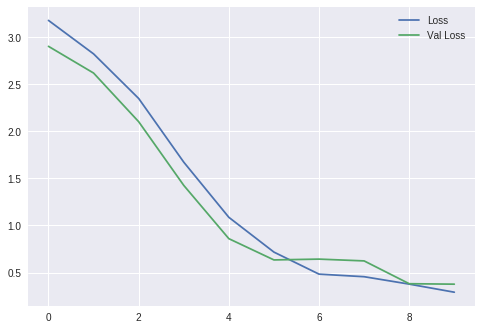

In [0]:
plt.figure()
plt.plot(np.arange(10),history.history['loss'],label="Loss")
plt.plot(np.arange(10),history.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()

In [0]:
X = image_data.reshape(-1,24,24,1)
y = np.repeat(lab, 10, axis=0)

In [0]:
indexes = np.arange(len(X))
np.random.shuffle(indexes)
X, y = X[indexes], y[indexes]

In [0]:
X_train, X_test = X[:14000], X[14000:]
y_train, y_test = y[:14000], y[14000:]

In [0]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(24,24,1)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(29, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 22, 22, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 4, 4, 64)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 2, 2, 128)         73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 1, 1, 128)         0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 1, 128)         0         
__________

In [0]:
history2 = model.fit(X_train, y_train, batch_size=16, epochs=10, validation_split = 0.2)

Train on 11200 samples, validate on 2800 samples
Epoch 1/10
11200/11200 [==============================] - 13s 1ms/step - loss: 2.4525 - acc: 0.2614 - val_loss: 1.6433 - val_acc: 0.4811
Epoch 2/10
11200/11200 [==============================] - 12s 1ms/step - loss: 1.5046 - acc: 0.5201 - val_loss: 1.0935 - val_acc: 0.6489
Epoch 3/10
11200/11200 [==============================] - 12s 1ms/step - loss: 1.1337 - acc: 0.6329 - val_loss: 0.9044 - val_acc: 0.6993
Epoch 4/10
11200/11200 [==============================] - 12s 1ms/step - loss: 0.9284 - acc: 0.6892 - val_loss: 0.7262 - val_acc: 0.7504
Epoch 5/10
11200/11200 [==============================] - 12s 1ms/step - loss: 0.8152 - acc: 0.7170 - val_loss: 0.6074 - val_acc: 0.7918
Epoch 6/10
11200/11200 [==============================] - 12s 1ms/step - loss: 0.7278 - acc: 0.7467 - val_loss: 0.5722 - val_acc: 0.7971
Epoch 7/10
11200/11200 [==============================] - 12s 1ms/step - loss: 0.6610 - acc: 0.7663 - val_loss: 0.5652 - val_acc:

In [0]:
output = model.predict_classes(X_test)
sum(np.argmax(y_test, axis=1) == output)/len(y_test)

0.8286486486486486

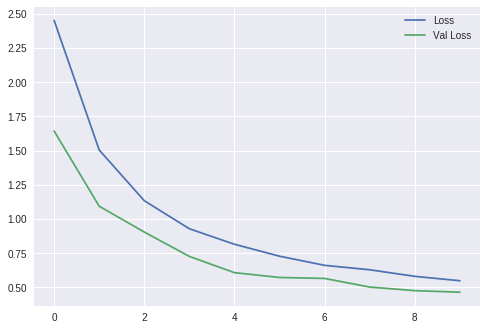

In [0]:
plt.figure()
plt.plot(np.arange(10),history2.history['loss'],label="Loss")
plt.plot(np.arange(10),history2.history['val_loss'],label='Val Loss')
plt.legend()
plt.show()